**Importing Neccessary Libraries**


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [39]:
df=pd.read_csv('/content/ctr.csv')

***about data***

In [40]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:32,0
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:35,1


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  10000 non-null  float64
 1   Age                       10000 non-null  float64
 2   Area Income               10000 non-null  float64
 3   Daily Internet Usage      10000 non-null  float64
 4   Ad Topic Line             10000 non-null  object 
 5   City                      10000 non-null  object 
 6   Gender                    10000 non-null  object 
 7   Country                   10000 non-null  object 
 8   Timestamp                 10000 non-null  object 
 9   Clicked on Ad             10000 non-null  int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 781.4+ KB


<Axes: xlabel='Daily Time Spent on Site', ylabel='Clicked on Ad'>

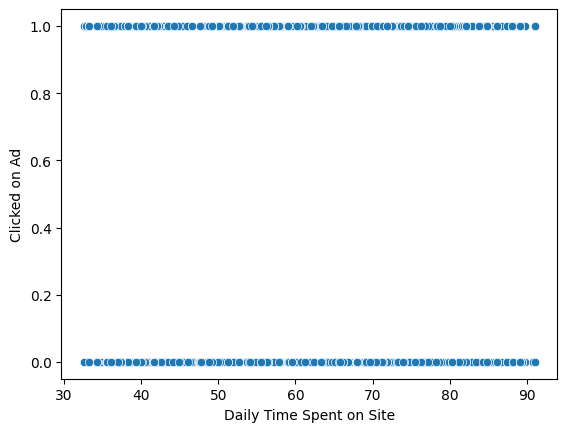

In [42]:
#scatter
sns.scatterplot(data=df,x='Daily Time Spent on Site',y='Clicked on Ad')

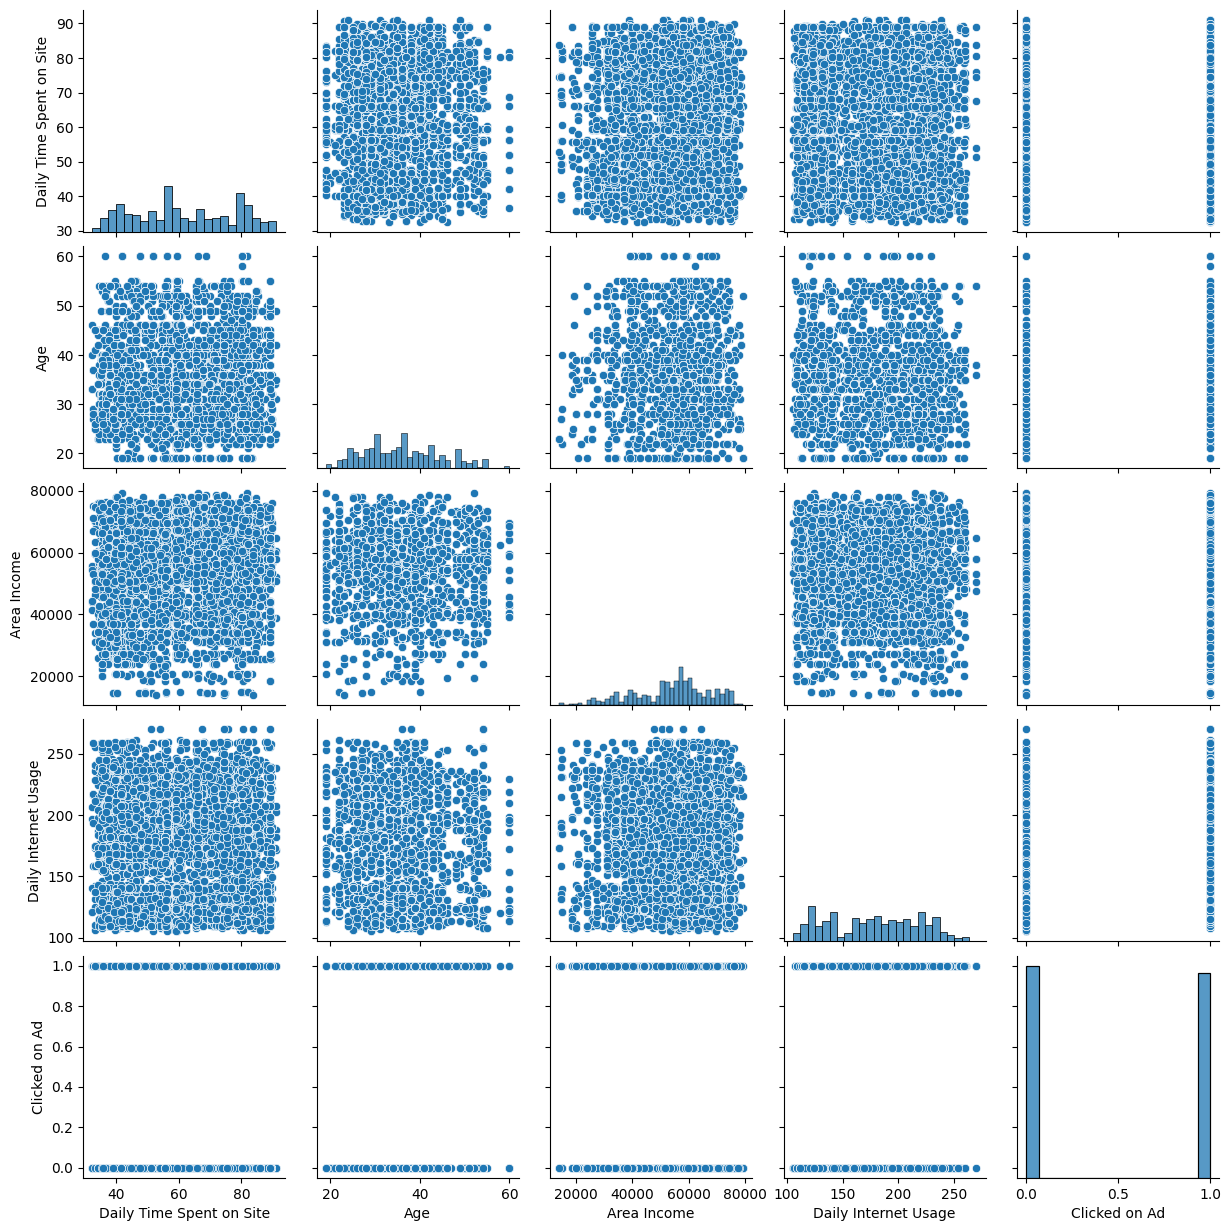

In [43]:
#Relationship with the independent
sns.pairplot(df)

In [44]:
df.isnull().sum()

,0
Daily Time Spent on Site,0
Age,0
Area Income,0
Daily Internet Usage,0
Ad Topic Line,0
City,0
Gender,0
Country,0
Timestamp,0
Clicked on Ad,0


In [45]:
#categorical data
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Gender', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [46]:
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:32,0
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:35,1
...,...,...,...,...,...,...,...,...,...,...
9995,41.73,31.0,61840.26,207.17,Profound executive flexibility,West Angelabury,Male,Singapore,2016-01-03 03:22:15,1
9996,41.73,28.0,51501.38,120.49,Managed zero tolerance concept,Kennedyfurt,Male,Luxembourg,2016-05-28 12:20:15,0
9997,55.60,39.0,38067.08,124.44,Intuitive exuding service-desk,North Randy,Female,Egypt,2016-01-05 11:53:17,0
9998,46.61,50.0,43974.49,123.13,Realigned content-based leverage,North Samantha,Female,Malawi,2016-04-04 07:07:46,1


**As observed the plots and using XGBoost algorithm**

In [47]:
print(df["Clicked on Ad"].value_counts())

Clicked on Ad
0    5083
1    4917
Name: count, dtype: int64


Click Through Rate is

In [48]:
click_through_rate = 4917 / 10000 * 100
print(f"The click through rate is: {click_through_rate}%")

The click through rate is: 49.17%


**Data Preprocessing**

In [49]:
#delete
df.drop(['Gender','Country','Timestamp'],axis=1,inplace=True,errors='ignore')

In [50]:
df.drop(['City'],axis=1,inplace=True)

In [51]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,Clicked on Ad
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,0
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,0
3,59.88,28.0,56180.93,207.17,Balanced empowering success,0
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,1


In [52]:
#categorical to numerical
df['Ad Topic Line']=LabelEncoder().fit_transform(df['Ad Topic Line'])


In [53]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,Clicked on Ad
0,62.26,32.0,69481.85,172.83,96,0
1,41.73,31.0,61840.26,207.17,301,0
2,44.40,30.0,57877.15,172.83,484,0
3,59.88,28.0,56180.93,207.17,24,0
4,49.21,30.0,54324.73,201.58,484,1


In [54]:
#standard scale
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df.drop('Clicked on Ad',axis=1))

StandardScaler()

**Training and apply logistic regression**

In [55]:
#splliting data
x=df.drop('Clicked on Ad',axis=1)
y=df['Clicked on Ad']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [59]:
#XGBoost classifier
from xgboost import XGBClassifier
model=XGBClassifier()


In [61]:
import xgboost
import sklearn
print(f"xgboost version: {xgboost.__version__}")
print(f"scikit-learn version: {sklearn.__version__}")

xgboost version: 2.1.3
scikit-learn version: 1.6.0


In [62]:
model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6)


In [66]:
# Create and fit the model
model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6)
model.fit(x_train, y_train)

# Predict and evaluate
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.81


In [67]:
#confusion metrics
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))


[[1304  239]
 [ 332 1125]]


In [68]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82      1543
           1       0.82      0.77      0.80      1457

    accuracy                           0.81      3000
   macro avg       0.81      0.81      0.81      3000
weighted avg       0.81      0.81      0.81      3000



In [69]:
#accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred)*100)

80.96666666666667
